In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# 🐼 Exploratory Analysis - Coding Challenge
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [3]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [170]:
ratings = pd.read_csv('data/ml-latest-small/ratings.csv')
movies = pd.read_csv('data/ml-latest-small/movies.csv', index_col=1)

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [240]:
movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [171]:
unique_movies = ratings.movieId.unique().tolist()
unique_users = ratings.userId.unique().tolist()

print(len(unique_movies))
print(len(unique_users)) 

9724
610


#### What is the average rating

In [27]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### which rating appears the most?

In [28]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [46]:
ratings_distibution_series = ratings.rating.value_counts()

ratings_distibution = pd.DataFrame([ratings_distibution_series]).transpose().sort_index()

#print(ratings_distibution_series)
ratings_distibution.head(10)


,rating
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551
5.0,13211


<AxesSubplot:ylabel='rating'>

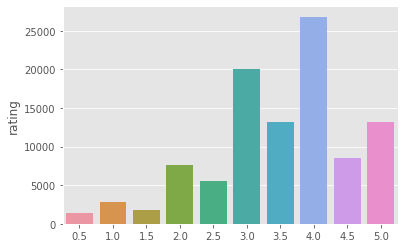

In [49]:
sns.barplot(data=ratings_distibution, x=ratings_distibution.index, y=ratings_distibution.rating)

# ratings['rating'].value_counts(normalize=True).sort_index().plot(kind='bar')
# plt.title("Distribution of Ratings", loc='left')


---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [51]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [147]:
user_counts = ratings.groupby('userId').count()
user_counts

,movieId,rating,timestamp
userId,,,
1,232,232,232
2,29,29,29
3,39,39,39
4,216,216,216
5,44,44,44
...,...,...,...
606,1115,1115,1115
607,187,187,187
608,831,831,831


- How many users have rated more than 20 movies?

In [64]:
user_counts.loc[user_counts.movieId > 20].index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', name='userId', length=596)

- How many movies rated the user with the most/ least ratings?

In [71]:
ratings.loc[ratings.rating == ratings.rating.min()].movieId.count()

1370

-  What is the *median* number of ratings?

In [74]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

In [83]:
u_139 = ratings.loc[ratings['userId'] == 139]
u_452 = ratings.loc[ratings['userId'] == 452]


In [89]:
print(len(u_139.movieId.unique().tolist()))

194


In [87]:
u_139.describe()

,userId,movieId,rating,timestamp
count,194.0,194.000000,194.000000,1.940000e+02
mean,139.0,36954.886598,2.144330,1.453925e+09
std,0.0,34858.404817,0.894597,4.044207e+02
min,139.0,19.000000,0.500000,1.453924e+09
25%,139.0,5460.000000,1.500000,1.453924e+09
50%,139.0,33083.000000,2.000000,1.453925e+09
75%,139.0,62644.750000,2.500000,1.453925e+09
max,139.0,122892.000000,4.000000,1.453925e+09


In [86]:
u_452.describe()

,userId,movieId,rating,timestamp
count,202.0,202.000000,202.000000,2.020000e+02
mean,452.0,2263.277228,4.556931,1.016665e+09
std,0.0,1334.385163,0.605100,4.420367e+06
min,452.0,10.000000,2.000000,1.013394e+09
25%,452.0,1244.500000,4.000000,1.013395e+09
50%,452.0,2022.000000,5.000000,1.013398e+09
75%,452.0,3208.000000,5.000000,1.019581e+09
max,452.0,6537.000000,5.000000,1.061328e+09


/Users/stefan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

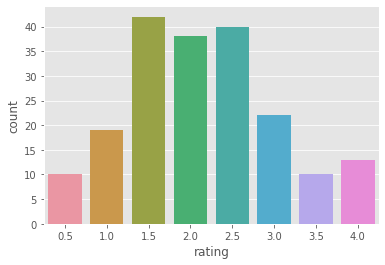

In [93]:
sns.countplot(u_139.rating)

/Users/stefan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

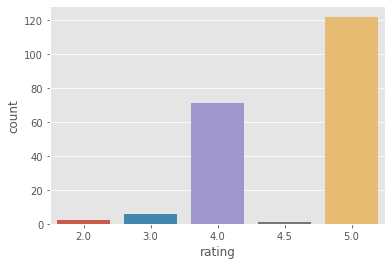

In [91]:
sns.countplot(u_452.rating)

<AxesSubplot:xlabel='rating', ylabel='Count'>

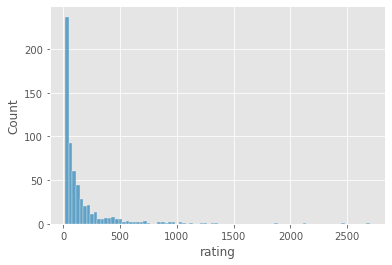

In [101]:
sns.histplot(user_counts.rating)

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [108]:
ratings.head()
ratings_avg = ratings.groupby('userId').mean().rating

- Which user gave the worst ratings on average, which user gave the best ratings?

In [112]:
ratings_avg.min()
#ratings_avg.max()


1.275

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

In [125]:
user_counts.loc[user_counts.movieId <= 20].index
ratings_avg.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            601, 602, 603, 604, 605, 606, 607, 608, 609, 610],
           dtype='int64', name='userId', length=610)

In [128]:
ratings_avg.loc[user_counts.loc[user_counts.movieId <= 20].index.tolist()].max()
ratings_avg.loc[user_counts.loc[user_counts.movieId <= 20].index.tolist()].min()

5.0

- Plot the distribution of average ratings! How would you characterize the distribution?

<AxesSubplot:xlabel='rating', ylabel='Count'>

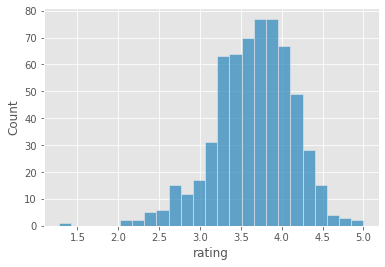

In [130]:
sns.histplot(ratings_avg)

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

In [146]:
ratings_avg.rename('rating_avg', inplace=True)
ratings_avg.head()

userId
1    4.366379
2    3.948276
3    2.435897
4    3.555556
5    3.636364
Name: rating_avg, dtype: float64

In [148]:
user_counts = pd.concat([user_counts, ratings_avg], axis=1)
user_counts.head()

,movieId,rating,timestamp,rating_avg
userId,,,,
1,232,232,232,4.366379
2,29,29,29,3.948276
3,39,39,39,2.435897
4,216,216,216,3.555556
5,44,44,44,3.636364


--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [172]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, Toy Story (1995) to Andrew Dice Clay: Dice Rules (1991)
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   genres   9742 non-null   object
dtypes: int64(1), object(1)
memory usage: 228.3+ KB


In [173]:
movies.tail()

,movieId,genres
title,,
Black Butler: Book of the Atlantic (2017),193581,Action|Animation|Comedy|Fantasy
No Game No Life: Zero (2017),193583,Animation|Comedy|Fantasy
Flint (2017),193585,Drama
Bungo Stray Dogs: Dead Apple (2018),193587,Action|Animation
Andrew Dice Clay: Dice Rules (1991),193609,Comedy


In [181]:
movies.loc[movies.index.duplicated()]
#np.unique(movies.index.duplicated())
#movies.loc[movies.movieId == 333]

,movieId,genres
title,,
Emma (1996),26958,Romance
War of the Worlds (2005),64997,Action|Sci-Fi
Confessions of a Dangerous Mind (2002),144606,Comedy|Crime|Drama|Romance|Thriller
Eros (2004),147002,Drama|Romance
Saturn 3 (1980),168358,Sci-Fi|Thriller


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [198]:
movies.loc[~movies.movieId.isin(ratings.movieId.unique())] #Yes to the answer // ~ does "not"
# Only True values inside the np array
#np.unique(movies.index.isin(ratings.movieId.unique())) 
#sorted(movies.movieId.unique().tolist()) == sorted(ratings.movieId.unique().tolist())


,movieId,genres
title,,
"Innocents, The (1961)",1076,Drama|Horror|Thriller
Niagara (1953),2939,Drama|Thriller
For All Mankind (1989),3338,Documentary
"Color of Paradise, The (Rang-e khoda) (1999)",3456,Drama
I Know Where I'm Going! (1945),4194,Drama|Romance|War
"Chosen, The (1981)",5721,Drama
"Road Home, The (Wo de fu qin mu qin) (1999)",6668,Drama|Romance
Scrooge (1970),6849,Drama|Fantasy|Musical
Proof (1991),7020,Comedy|Drama|Romance


#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [214]:
# movies.drop(['index'], axis= 1,inplace=True)

In [211]:
movies.reset_index(inplace=True)  
movies['year'] = movies.title.str.extract(r'\((\d{4})\)')


,index,title,movieId,genres,year
0,0,Toy Story (1995),1,Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,Jumanji (1995),2,Adventure|Children|Fantasy,1995
2,2,Grumpier Old Men (1995),3,Comedy|Romance,1995
3,3,Waiting to Exhale (1995),4,Comedy|Drama|Romance,1995
4,4,Father of the Bride Part II (1995),5,Comedy,1995


In [215]:
movies.head()

,title,movieId,genres,year
0,Toy Story (1995),1,Adventure|Animation|Children|Comedy|Fantasy,1995
1,Jumanji (1995),2,Adventure|Children|Fantasy,1995
2,Grumpier Old Men (1995),3,Comedy|Romance,1995
3,Waiting to Exhale (1995),4,Comedy|Drama|Romance,1995
4,Father of the Bride Part II (1995),5,Comedy,1995


#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [219]:
movies.set_index('movieId', inplace=True)


movieId
1         [Adventure, Animation, Children, Comedy, Fantasy]
2                            [Adventure, Children, Fantasy]
3                                         [Comedy, Romance]
4                                  [Comedy, Drama, Romance]
5                                                  [Comedy]
                                ...                        
193581                 [Action, Animation, Comedy, Fantasy]
193583                         [Animation, Comedy, Fantasy]
193585                                              [Drama]
193587                                  [Action, Animation]
193609                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [227]:
movies.loc[10]

title              GoldenEye (1995)
genres    Action|Adventure|Thriller
year                           1995
Name: 10, dtype: object

In [235]:
genres = movies.genres.str.split('|').explode().groupby('movieId').count().to_frame()
genres.sort_values('genres')

,genres
movieId,
7299,1
6592,1
6598,1
6604,1
6609,1
...,...
4719,7
1907,7
2987,7


In [236]:
movies.loc[81132]

title                                         Rubber (2010)
genres    Action|Adventure|Comedy|Crime|Drama|Film-Noir|...
year                                                   2010
Name: 81132, dtype: object

---
## Fuzzy String Search

#### Search for "star wars" movies in the items table

- install the library [thefuzz](https://github.com/seatgeek/thefuzz)
- search for the query "star wars" in the list of movie titles
    - set the `movieId` as index for the dataframe
    - extract the `titles` column and use it as input to `extractBests()`
- look at the following code snippet and research:
    - what is the third entry in the tuples returned?
    - what is the second entry in the tuples returned?

In [239]:
from thefuzz import fuzz, process

things = {"B": "banana", 2: "bananabred", "bb": "beans", "K": "kiwis", "A": "apples"}
search_query = "bananaa"
match = process.extractBests(
    search_query, things, scorer=fuzz.token_set_ratio
)
match

/Users/stefan/opt/anaconda3/lib/python3.8/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('banana', 92, 'B'),
 ('bananabred', 71, 2),
 ('beans', 50, 'bb'),
 ('apples', 15, 'A'),
 ('kiwis', 0, 'K')]

In [238]:
movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

---
#### Count the number of ratings per movie title!

- What are the top 10 most rated movies in the dataset?

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Look at the top 10 movies that have the highest coefficient of variation!
 

---

#### Calculate the average rating per movie title!

- Make a visualization of the distribution of average ratings per movie

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!